## APS 5 - ANÁLISE DA DIFUSÃO DE UM POLUENTE EM UM RIO COM CORRENTEZA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from IPython.display import HTML


In [2]:
## constantes
deltaT = 5e-2
deltaXY = 5e-1
T = 7

alpha = 1 #Valor alpha
K = 1 #coeficiente de difusão
Q = 80.0
Qc = Q / pow(deltaXY,2)
Tq = 2

n = 1

Lx = 30
Ly = 30
X = np.arange(0,Lx+deltaXY,deltaXY)
Y = np.arange(0,Ly+deltaXY,deltaXY)
t = np.arange(0,T+deltaT,deltaT)

nodeMatrix = np.zeros(shape =(len(X), len(Y)))

# a = (np.abs(X - n/1.4)).argmin()
# b = (np.abs(Y - 60/(5*n))).argmin()

a = (np.abs(X -15)).argmin() 
b = (np.abs(Y -15)).argmin()


In [3]:
def u(x,y):
#     return alpha
    return 1

def v(x,y):
#     return alpha * math.sin((math.pi/5)*x)
    return 0

In [4]:
def diff2Central(anterior, atual, prox, delta):
    return (prox -(2*atual) + anterior)/pow(deltaXY,2)

def diffCentral(anterior, prox, delta):
    return (prox - anterior)/(2*delta)

In [5]:
#Aplica a conta específica na lista de nodes
def calcDiff2D(nodes_t, Qc):
    nodes_return = nodes_t.copy()
    
    nodes_return[:,0] =  nodes_return[:,1]
    nodes_return[:,-1] = nodes_return[:,-2]
    nodes_return[0,:] = nodes_return[1,:]
    nodes_return[-1,:] = nodes_return[-2,:]
    
    for y in range(1,len(nodes_t) -1):
        for x in range(1,len(nodes_t[0]) -1):
            
            p1 = u(x,y)*diffCentral(nodes_t[y][x-1], nodes_t[y][x+1], deltaXY)
            p2 = v(x,y)*diffCentral(nodes_t[y-1][x], nodes_t[y+1][x], deltaXY)
            p3 = K*diff2Central(nodes_t[y-1][x],nodes_t[y][x],nodes_t[y+1][x], deltaXY)
            p4 = K*diff2Central(nodes_t[y][x-1],nodes_t[y][x],nodes_t[y][x+1], deltaXY)

            if(x == a and y == b):
                nodes_return[y][x] = (Qc - (p1 + p2 -p3 -p4))*deltaT + nodes_t[y][x]
            else:
                nodes_return[y][x] = (- (p1 + p2 -p3 -p4))*deltaT + nodes_t[y][x]
                
                
            if nodes_return[y][x] < 0:
                nodes_return[y][x] = 0
                
    return nodes_return


def doSomething(nodes_t,time):
    ims = []
    
    for l in range(len(time)):
        
        if(time[l] < Tq):
            nodes_t = calcDiff2D(nodes_t.copy(), Qc)
        else:
            nodes_t = calcDiff2D(nodes_t.copy(), 0)

        im = plt.imshow(nodes_t,cmap="viridis",vmin=0, vmax=1,interpolation="nearest",extent=[0,Lx,0,Ly], animated=True)
        time_text = plt.text(Lx/2, Ly + 1, 'matplotlib', horizontalalignment='center') #, fontsize=32
        time_text.set_text("{:.3f} s".format(time[l]))
        ims.append([im, time_text])

    return nodes_t, ims


In [6]:
# %%time
fig = plt.figure()

nodeMatrix = np.zeros(shape =(len(X), len(Y)))
nodeMatrix, ims= doSomething(nodeMatrix,t)

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Kg/m3', rotation=90 )
# plt.title("APS5")
plt.xlabel("[m]")
plt.ylabel("[m]")
plt.close()

video  = ani.to_html5_video()

ani.save("APS5.mp4", writer="ffmpeg", fps=(len(t)/T), dpi=250)
HTML(video)

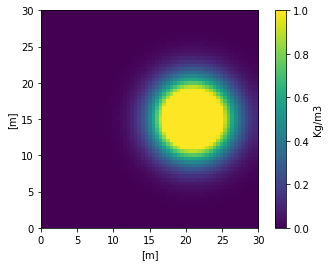

Ponto (20,20) 0.7179


In [7]:
 
fig = plt.figure()


plt.imshow(nodeMatrix,cmap="viridis",vmin=0, vmax=1,interpolation="nearest",extent=[0,Lx,0,Ly])
cbar = plt.colorbar()
cbar.ax.set_ylabel('Kg/m3', rotation=90 )
plt.xlabel("[m]")
plt.ylabel("[m]")
plt.savefig("archive", dpi = 300)
plt.show()
print("Ponto (20,20) {:.4f}".format(nodeMatrix[40][40]))

In [8]:
# import imageio
# with imageio.get_writer('movie.gif', mode='I', duration=0.05) as writer:
#     for i in range(0,len(t),2):
#         image = imageio.imread(f"./img/nodes{i}.png")
#         if(image is not None):
#             writer.append_data(image)

In [9]:
# !rm ./img/nodes*.png

In [10]:
!open .
